In [86]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Loading data
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [87]:
df.shape

(11162, 17)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [89]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [90]:
# From the result it can be seen that dataset have no missing value.

In [91]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [92]:
# create list of numeric and categorical columns
num_cols=[]
cat_cols=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_cols.append(i)
    elif df[i].dtype=='object':
        cat_cols.append(i)
print("Numeric Columns : ", num_cols)
print("Categorical Columns:",cat_cols)

Numeric Columns :  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [93]:
df.drop(["duration"] , axis=1,inplace=True)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [94]:
df.replace('unknown',np.NaN,inplace=True)
df.isna().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

In [95]:
# There is no missing value, but have unknown values in job, education,contact and poutcome.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

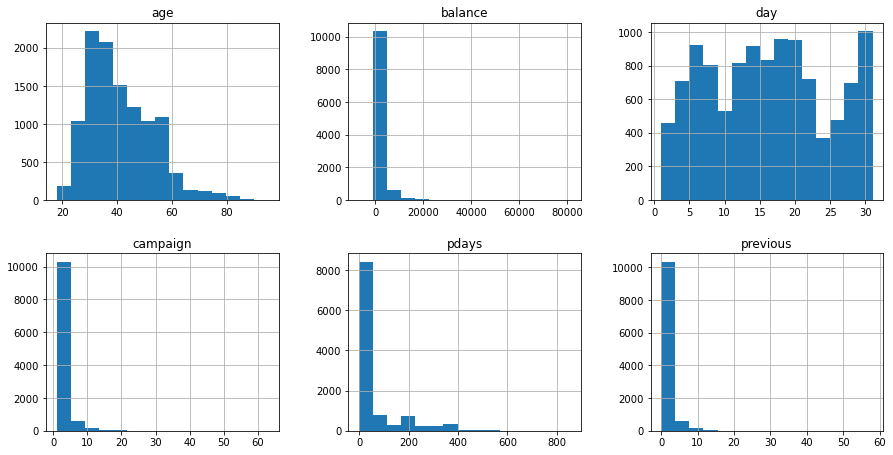

In [96]:
df[df.columns].hist(bins=15, figsize=(15, 16), layout=(4, 3))

<AxesSubplot:>

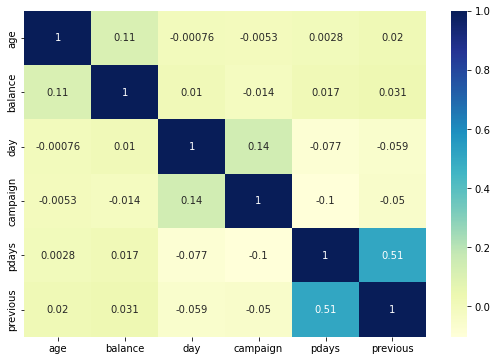

In [97]:
# Checking correlation between the variables
corr = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True, cmap = "YlGnBu")

In [98]:
# From the heatmap, we can see negative values.

In [99]:
# Pre processing
# Scaling numerical data to avoid outlier that can affect the model. 
# Using StandardScaler() function from sklearn, for scaling numerical data. 
from sklearn.preprocessing import StandardScaler
df1 = df.copy()
scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df1[num_cols] = scaler.fit_transform(df1[num_cols])
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,NaN,-1.265746,may,-0.554168,-0.481184,-0.36326,NaN,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,NaN,-1.265746,may,-0.554168,-0.481184,-0.36326,NaN,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,NaN,-1.265746,may,-0.554168,-0.481184,-0.36326,NaN,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,NaN,-1.265746,may,-0.554168,-0.481184,-0.36326,NaN,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,NaN,-1.265746,may,-0.186785,-0.481184,-0.36326,NaN,yes


In [100]:
#  Dropping marital and contact columns
df1.drop(['marital'],axis=1, inplace=True)
df1.drop(['contact'],axis=1, inplace=True)
df1.head()

,age,job,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,secondary,no,0.252525,yes,no,-1.265746,may,-0.554168,-0.481184,-0.36326,NaN,yes
1,1.239676,admin.,secondary,no,-0.459974,no,no,-1.265746,may,-0.554168,-0.481184,-0.36326,NaN,yes
2,-0.019470,technician,secondary,no,-0.080160,yes,no,-1.265746,may,-0.554168,-0.481184,-0.36326,NaN,yes
3,1.155733,services,secondary,no,0.293762,yes,no,-1.265746,may,-0.554168,-0.481184,-0.36326,NaN,yes
4,1.071790,admin.,tertiary,no,-0.416876,no,no,-1.265746,may,-0.186785,-0.481184,-0.36326,NaN,yes


In [101]:
# Changing categorical values intpo numeric values
df1[['default','housing','loan']]=df1[['default','housing','loan']].replace(["yes","no"],["1","0"])
df1['month']=df1['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df1['job']=df1['job'].replace(['unknown'],['other'])
df1.head()

,age,job,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,secondary,0,0.252525,1,0,-1.265746,5,-0.554168,-0.481184,-0.36326,NaN,yes
1,1.239676,admin.,secondary,0,-0.459974,0,0,-1.265746,5,-0.554168,-0.481184,-0.36326,NaN,yes
2,-0.019470,technician,secondary,0,-0.080160,1,0,-1.265746,5,-0.554168,-0.481184,-0.36326,NaN,yes
3,1.155733,services,secondary,0,0.293762,1,0,-1.265746,5,-0.554168,-0.481184,-0.36326,NaN,yes
4,1.071790,admin.,tertiary,0,-0.416876,0,0,-1.265746,5,-0.186785,-0.481184,-0.36326,NaN,yes


In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['job']=le.fit_transform(df['job'])
df1['education']=le.fit_transform(df['education'])
df1['poutcome']=le.fit_transform(df['poutcome'])
df1.head()

,age,job,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491505,0,1,0,0.252525,1,0,-1.265746,5,-0.554168,-0.481184,-0.36326,3,yes
1,1.239676,0,1,0,-0.459974,0,0,-1.265746,5,-0.554168,-0.481184,-0.36326,3,yes
2,-0.019470,9,1,0,-0.080160,1,0,-1.265746,5,-0.554168,-0.481184,-0.36326,3,yes
3,1.155733,7,1,0,0.293762,1,0,-1.265746,5,-0.554168,-0.481184,-0.36326,3,yes
4,1.071790,0,2,0,-0.416876,0,0,-1.265746,5,-0.186785,-0.481184,-0.36326,3,yes


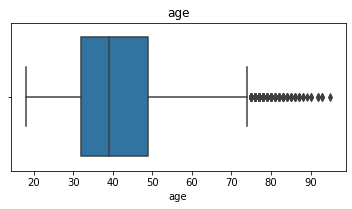

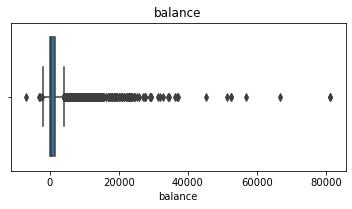

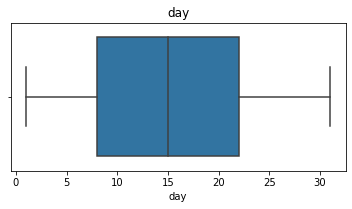

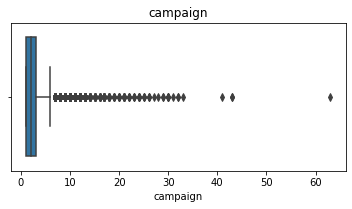

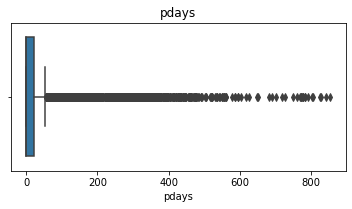

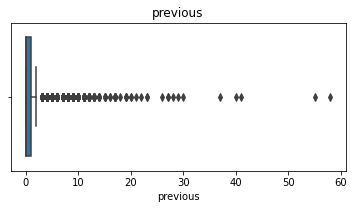

In [112]:
# Outliers
col=df1[['age','balance','day','campaign','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(6,6))
  plt.subplot(2,1,2)
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()
  n=n+1

In [105]:
# Removing outliers
from scipy import stats
z = np.abs(stats.zscore(df1[['age','balance','campaign','pdays','previous']]))
print(z)
df1=df1[(z<3).all(axis=1)]
df1.shape

            age   balance  campaign     pdays  previous
0      1.491505  0.252525  0.554168  0.481184  0.363260
1      1.239676  0.459974  0.554168  0.481184  0.363260
2      0.019470  0.080160  0.554168  0.481184  0.363260
3      1.155733  0.293762  0.554168  0.481184  0.363260
4      1.071790  0.416876  0.186785  0.481184  0.363260
...         ...       ...       ...       ...       ...
11157  0.691015  0.473616  0.554168  0.481184  0.363260
11158  0.187357  0.246658  0.547981  0.481184  0.363260
11159  0.774958  0.464934  0.186785  0.481184  0.363260
11160  0.148416  0.473926  0.186785  1.109571  1.818332
11161  0.607072  0.473926  0.554168  0.481184  0.363260

[11162 rows x 5 columns]


(10285, 14)

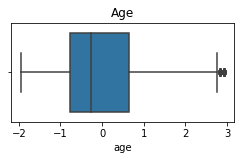

In [121]:
#checking outliers removed 
plt.figure(figsize=(4,4))
plt.subplot(2,1,2)
sns.boxplot(df1['age'])
plt.title("Age")
plt.show()

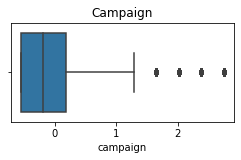

In [122]:
plt.figure(figsize=(4,4))
plt.subplot(2,1,2)
sns.boxplot(df1['campaign'])
plt.title("Campaign")
plt.show()

In [131]:
# Train and Test split
# Using scikit learn’s train_test_split method 
# Select Features
feature = df1.drop('deposit', axis=1)
# Select Target
target = df1['deposit']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature , target, test_size=0.2, random_state=1) #80/20 split
print('Training feature shape:', x_train.shape)
print('Testing feature shape:', x_test.shape)
print('Training label shape:', y_train.shape)
print('Training label shape:', y_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Training feature shape: (8228, 13)
Testing feature shape: (2057, 13)
Training label shape: (8228,)
Training label shape: (2057,)


In [ ]:
# Training the model with differrnt algorithms

In [153]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [154]:
acc_lr = accuracy_score(y_test,y_pred)
recall_lr= recall_score(y_test,y_pred,average='macro')
precision_lr = precision_score(y_test,y_pred,average='macro')
f1score_lr = f1_score(y_test,y_pred,average='macro')
print("Accuracy :",acc_lr)
print("Precision score :",precision_lr)
print("Recall_score :",recall_lr)
print('f1 score :',f1score_lr)

Accuracy : 0.6456003889158969
Precision score : 0.6466045109533489
Recall_score : 0.64144536149669
f1 score : 0.6404581640685221


In [155]:
confusion_matrix(y_test,y_pred)

array([[787, 289],
       [440, 541]], dtype=int64)

In [156]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

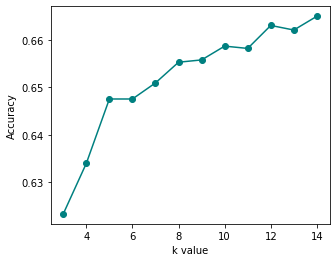

In [157]:
plt.figure(figsize=(5,4))
plt.plot(neighbors,acc_values,'o-',color='teal')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [158]:
# Taking k=5
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [159]:
acc_knn = accuracy_score(y_test,y_pred)
recall_knn= recall_score(y_test,y_pred,average='macro')
precision_knn = precision_score(y_test,y_pred,average='macro')
f1score_knn = f1_score(y_test,y_pred,average='macro')
print("Accuracy :",acc_knn)
print("Precision score :",precision_knn)
print("Recall_score :",recall_knn)
print('f1 score :',f1score_knn)

Accuracy : 0.6475449684005834
Precision score : 0.6491404781090518
Recall_score : 0.6430790976509062
f1 score : 0.6418225935951853


In [160]:
confusion_matrix(y_test,y_pred)

array([[796, 280],
       [445, 536]], dtype=int64)

In [161]:
y_test.value_counts()

no     1076
yes     981
Name: deposit, dtype: int64

In [162]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [163]:
acc_rf = accuracy_score(y_test,y_pred)
recall_rf= recall_score(y_test,y_pred,average='macro')
precision_rf = precision_score(y_test,y_pred,average='macro')
f1score_rf = f1_score(y_test,y_pred,average='macro')
print("Accuracy :",acc_rf)
print("Precision score :",precision_rf)
print("Recall_score :",recall_rf)
print('f1 score :',f1score_rf)

Accuracy : 0.7073407875546913
Precision score : 0.7137009875036269
Recall_score : 0.7023502305893765
f1 score : 0.7014476359105515


In [165]:
confusion_matrix(y_test,y_pred)

array([[872, 204],
       [398, 583]], dtype=int64)

In [166]:
# Fine tuning of Hyper parameters
rft=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

In [168]:
acc_rf = accuracy_score(y_test,y_pred)
recall_rf= recall_score(y_test,y_pred,average='macro')
precision_rf = precision_score(y_test,y_pred,average='macro')
f1score_rf = f1_score(y_test,y_pred,average='macro')
print("Accuracy :",acc_rf)
print("Precision score :",precision_rf)
print("Recall_score :",recall_rf)
print('f1 score :',f1score_rf)

Accuracy : 0.7131745260087506
Precision score : 0.7349163809284361
Recall_score : 0.7053614398478147
f1 score : 0.7010044779237571


In [171]:
# Finding best model
ind=['Logistic regression','Random forest','KNN']
data={"Accuracy":[acc_lr,acc_rf,acc_knn],"Recall":[recall_lr,recall_rf,recall_knn],"Precision":[precision_lr,precision_rf,precision_knn],
    'f1 score':[f1score_lr,f1score_rf,f1score_knn]}
Result=pd.DataFrame(data=data,index=ind)
print('Best Model is : \n',Result)

Best Model is : 
                      Accuracy    Recall  Precision  f1 score
Logistic regression  0.645600  0.641445   0.646605  0.640458
Random forest        0.713175  0.705361   0.734916  0.701004
KNN                  0.647545  0.643079   0.649140  0.641823


In [ ]:
# From the comparison, we can see that Random Forest model tops from other models in 4 metrics evaluated. 